## Name = Gauravraje Wagh
### Roll No. = DS24MS12

# Title: Cardiovascular Risk Prediction

#### Project Description: 
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both
demographic, behavioral, and medical risk factors.

### Importing Important Packages

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading Dataset

In [165]:
df = pd.read_csv('https://raw.githubusercontent.com/rahulinchal/SPPU/refs/heads/main/Data/data_cardiovascular_risk.csv')

In [167]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Data Cleaning

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [171]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [173]:
df = df.dropna()

In [177]:
df.duplicated().sum()

0

### Feature engineering

In [179]:
df['sex'].unique()

array(['M', 'F'], dtype=object)

In [181]:
df.is_smoking.unique()

array(['NO', 'YES'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['sex'])

In [189]:
df = pd.get_dummies(df, columns=['is_smoking'])

In [191]:
df.head()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
1,1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,False,True,True,False
2,2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,True,False,False,True
3,3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,False,True,False,True
4,4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,True,False,False,True
5,5,61,3.0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,True,False,True,False


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 1 to 3389
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2927 non-null   int64  
 1   age              2927 non-null   int64  
 2   education        2927 non-null   float64
 3   cigsPerDay       2927 non-null   float64
 4   BPMeds           2927 non-null   float64
 5   prevalentStroke  2927 non-null   int64  
 6   prevalentHyp     2927 non-null   int64  
 7   diabetes         2927 non-null   int64  
 8   totChol          2927 non-null   float64
 9   sysBP            2927 non-null   float64
 10  diaBP            2927 non-null   float64
 11  BMI              2927 non-null   float64
 12  heartRate        2927 non-null   float64
 13  glucose          2927 non-null   float64
 14  TenYearCHD       2927 non-null   int64  
 15  sex_F            2927 non-null   bool   
 16  sex_M            2927 non-null   bool   
 17  is_smoking_NO    29

In [195]:
df.isnull().sum()

id                 0
age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
sex_F              0
sex_M              0
is_smoking_NO      0
is_smoking_YES     0
dtype: int64

In [197]:
df.duplicated().sum()

0

In [199]:
df.shape

(2927, 19)

## Treating the Outliers

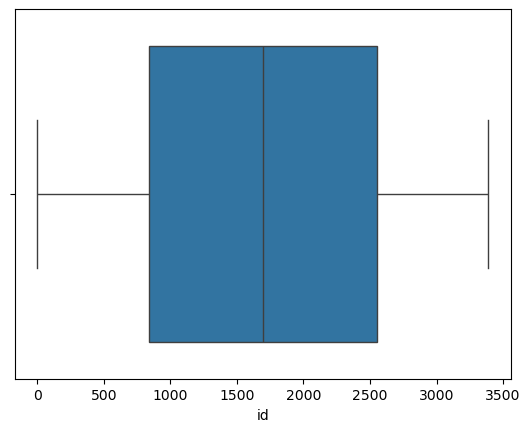

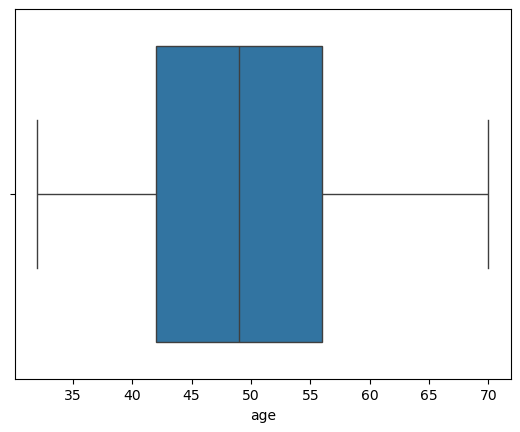

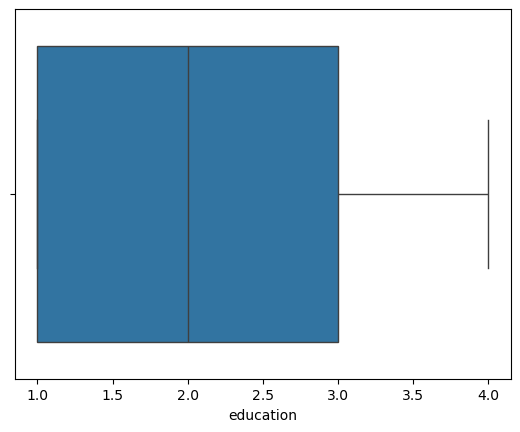

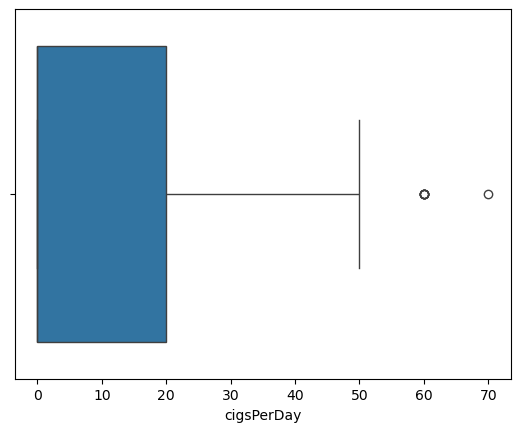

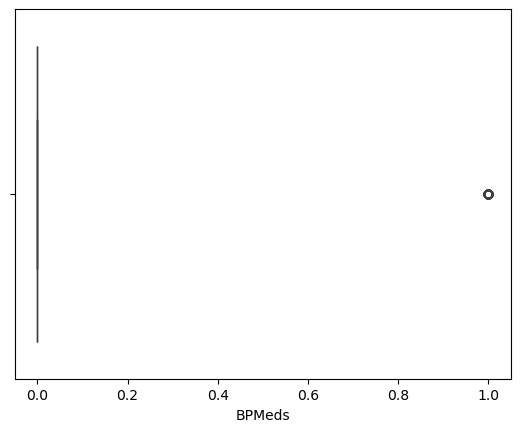

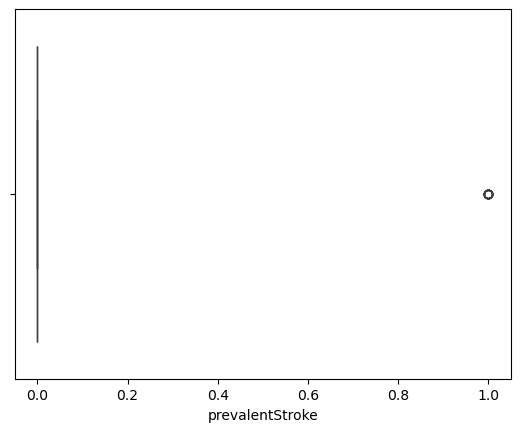

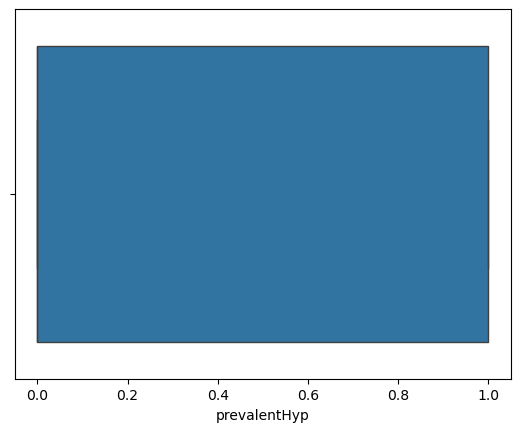

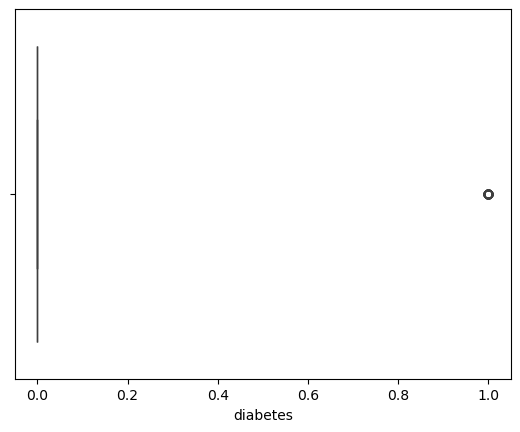

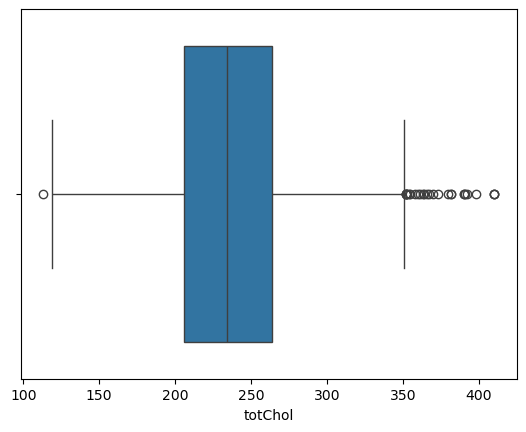

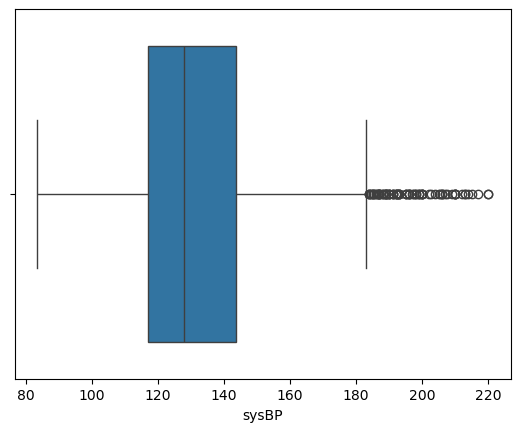

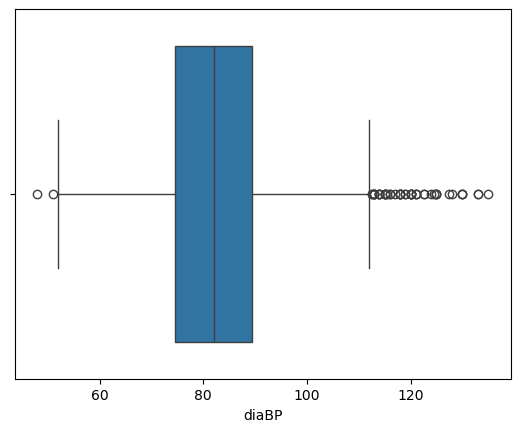

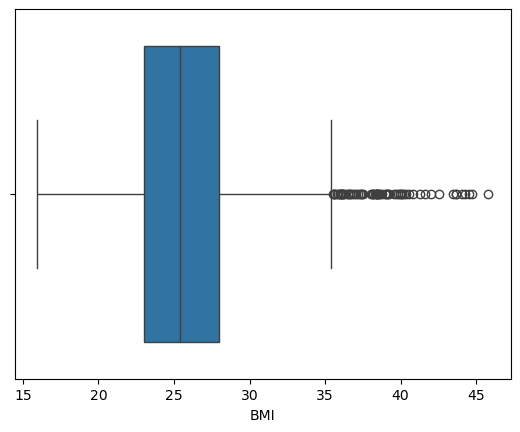

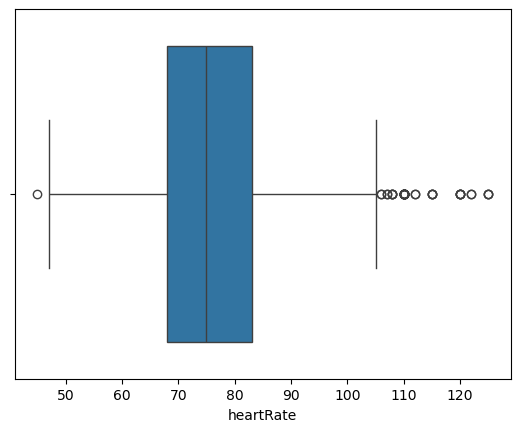

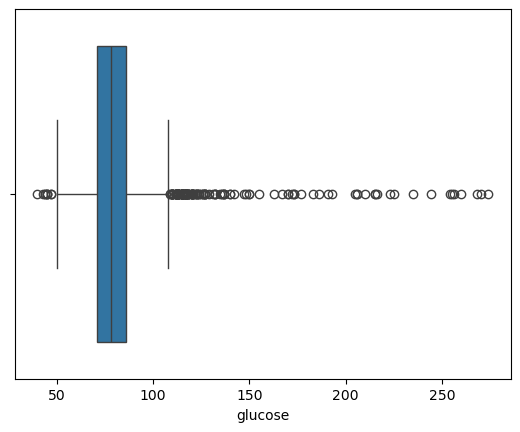

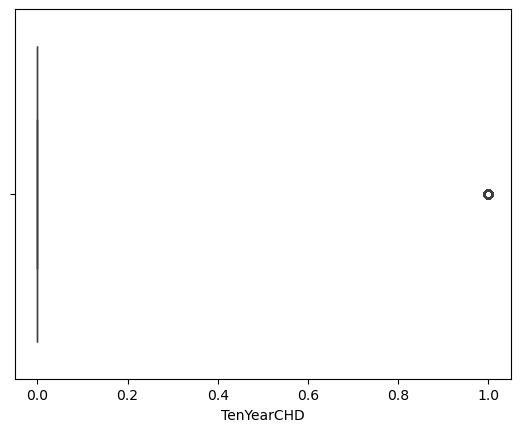

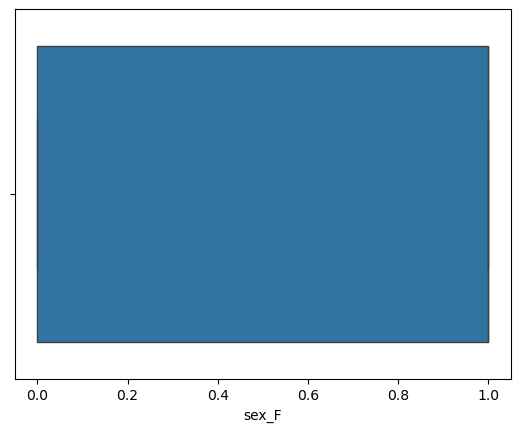

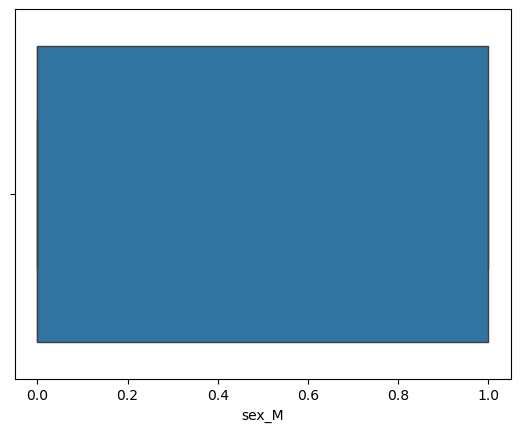

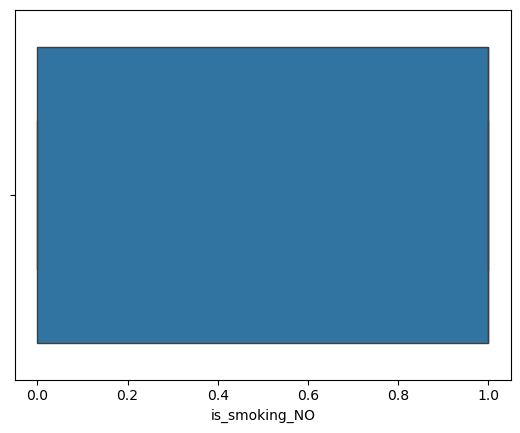

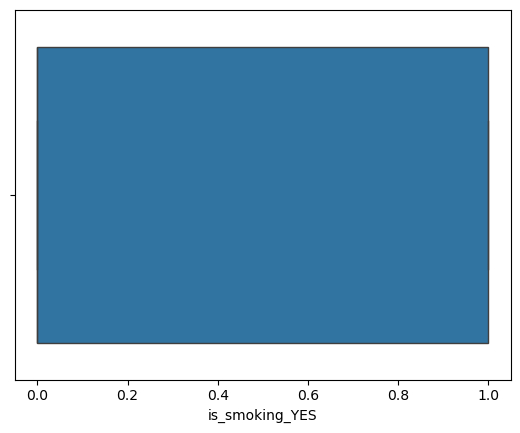

In [223]:
for i in df.columns:
    sns.boxplot(x = df[i])
    plt.show()

In [203]:
df = df[df.totChol < 430]

In [207]:
df = df[df['sysBP'] < 230]

In [213]:
df = df[df['BMI'] < 48]

In [215]:
df = df[df['heartRate'] < 130]

In [221]:
df = df[df['glucose'] < 290]

In [225]:
x = df.drop(['TenYearCHD'], axis= 1).values   #Independent Variable
y = df['TenYearCHD'].values                   #Dependent Variable

### Splitting data into Train/Test Sets

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0)

In [123]:
x_train.shape

(2048, 18)

In [125]:
x_test.shape

(879, 18)

### Standard Scalar

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [229]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Linear Regression

In [232]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [234]:
log.fit(x_train_scaled, y_train)

LogisticRegression()

In [323]:
y_pred = log.predict(x_test_scaled)

In [238]:
print("Training Score: ", (log.score(x_train_scaled, y_train))*100 )
print("Testing Score: ", (log.score(x_test_scaled, y_test))*100 )

Training Score:  85.9375
Testing Score:  84.64163822525597


### DecisionTreeClassifier

In [242]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [326]:
dt_y_pred = dt.predict(x_test_scaled)

In [246]:
print("Trainig Score: ",(dt.score(x_train_scaled, y_train))*100 )
print("Testing Score: ",(dt.score(x_test_scaled, y_test))*100 )

Trainig Score:  100.0
Testing Score:  74.97155858930603


### Random Forest Classifier

In [248]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [159]:
y_pred_rf = rf.predict(x_test_scaled)

In [250]:
print("Trainig Score: ",(rf.score(x_train_scaled, y_train))*100 )
print("Testing Score: ",(rf.score(x_test_scaled, y_test))*100 )

Trainig Score:  100.0
Testing Score:  84.52787258248009


### Gradient Boosting Classifier

In [270]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [272]:
gb.fit(x_train_scaled, y_train)

GradientBoostingClassifier()

In [274]:
gb.score(x_train_scaled, y_train)*100

89.111328125

In [276]:
gb.score(x_test_scaled, y_test)*100

83.8452787258248

### XG Booster

In [256]:
from xgboost import XGBClassifier
xg = XGBClassifier()

In [258]:
xg.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [266]:
xg.score(x_train_scaled, y_train)*100

100.0

In [268]:
xg.score(x_test_scaled, y_test)*100

81.68373151308305

### Support Vector Regressor

In [278]:
from sklearn.svm import SVC
svc = SVC()

In [282]:
svc.fit(x_train_scaled, y_train)

SVC()

In [284]:
svc.score(x_train_scaled, y_train)*100

86.279296875

In [286]:
svc.score(x_test_scaled, y_test)*100

84.30034129692832

### Evaluation Metrics

In [288]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [292]:
confusion_matrix(y_train, log.predict(x_train_scaled))

array([[1729,   12],
       [ 276,   31]], dtype=int64)

In [321]:
precision_score(y_train, log.predict(x_train_scaled))*100

72.09302325581395

In [319]:
recall_score(y_train, log.predict(x_train_scaled))*100

10.097719869706841

In [317]:
f1_score(y_train, log.predict(x_train_scaled))*100

17.71428571428571

In [303]:
confusion_matrix(y_test, log.predict(x_test_scaled))

array([[736,   6],
       [129,   8]], dtype=int64)

In [315]:
precision_score(y_test, log.predict(x_test_scaled))*100

57.14285714285714

In [313]:
recall_score(y_test, log.predict(x_test_scaled))*100

5.839416058394161

In [311]:
f1_score(y_test, log.predict(x_test_scaled))*100

10.596026490066226

## Printing all the Accuracy Using DataFrame

In [346]:
overall_scores = pd.DataFrame({'Linear Regression': ((log.score(x_train_scaled, y_train))*100, (log.score(x_test_scaled, y_test))*100),
                              'Decision Tree Regressor': ((dt.score(x_train, y_train))*100, (dt.score(x_test, y_test))*100),
                              'Random Forest Regressor': ((rf.score(x_train, y_train))*100, (rf.score(x_test, y_test))*100),
                              'Gradient Boosting Regressor': ((gb.score(x_train, y_train))*100, (gb.score(x_test, y_test))*100),
                              'XGB Regressor' : ((xg.score(x_train, y_train))*100,(xg.score(x_test, y_test))*100),
                              'Support Vector Regressor' : ((svc.score(x_train, y_train))*100 , (svc.score(x_test, y_test))*100)                                               
                                                             })
overall_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Linear Regression,85.937500,84.641638
Decision Tree Regressor,100.000000,74.971559
Random Forest Regressor,100.000000,84.527873
Gradient Boosting Regressor,89.111328,83.845279
XGB Regressor,100.000000,81.683732
Support Vector Regressor,86.279297,84.300341


## Observations :

**Decision Tree Regressor**  and **XGB Regressor** show overfitting — 100% training score but much lower test scores, especially **Decision Tree** with 74.97% test score.

**Random Forest Regressor** also has 100% training but generalizes better, almost matching Linear Regression.

**Linear Regression** and **Support Vector Regressor** have balanced training and test scores, indicating good generalization.

**Gradient Boosting Regressor** performs solidly, with slight underfitting compared to Random Forest but still stable.

Overall, **Linear Regression**, **Support Vector Regressor**, and **Random Forest Regressor** are the best-performing and reliable models.